___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 2<br><br>Installing Tensorflow & Keras Syntax Basics<br><br>Fake Reg<br><h1>

# Installing Tensorflow

In [1]:
!python --version

Python 3.8.8


In [2]:
!pip install tensorflow

You should consider upgrading via the 'c:\users\metea\anaconda3\python.exe -m pip install --upgrade pip' command.



     -------------------------------------- 444.1/444.1 MB 7.0 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 KB ? eta 0:00:00
     ---------------------------------------- 57.5/57.5 KB 3.1 MB/s eta 0:00:00
     --------------------------------------- 14.2/14.2 MB 46.8 MB/s eta 0:00:00
     ------------------------------------- 438.7/438.7 KB 26.8 MB/s eta 0:00:00
     ---------------------------------------- 1.6/1.6 MB 34.4 MB/s eta 0:00:00
     ---------------------------------------- 5.8/5.8 MB 46.3 MB/s eta 0:00:00
     ---------------------------------------- 126.7/126.7 KB ? eta 0:00:00
     ------------------------------------- 895.9/895.9 KB 28.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 3.5/3.5 MB 55.6 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 46.8 MB/s eta 0:00:00
     ----------------------------

In [3]:
import tensorflow as tf
tf.__version__

'2.9.1'

# Keras Syntax Basics

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#df = pd.read_csv("drive/MyDrive/Colab_Files/data/fake_reg.csv")

In [5]:
df = pd.read_csv("fake_reg.csv")

## Exploratory Data Analysis and Visualization

In [6]:
df.head()

,price,feature1,feature2
0,461.528,999.788,999.766
1,548.130,998.862,1001.042
2,410.297,1000.070,998.844
3,540.382,999.952,1000.441
4,546.025,1000.446,1000.339


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1000.000,498.673,93.785,223.347,433.026,502.382,564.922,774.408
feature1,1000.000,1000.014,0.974,997.058,999.332,1000.010,1000.638,1003.208
feature2,1000.000,999.980,0.948,996.996,999.316,1000.002,1000.645,1002.666


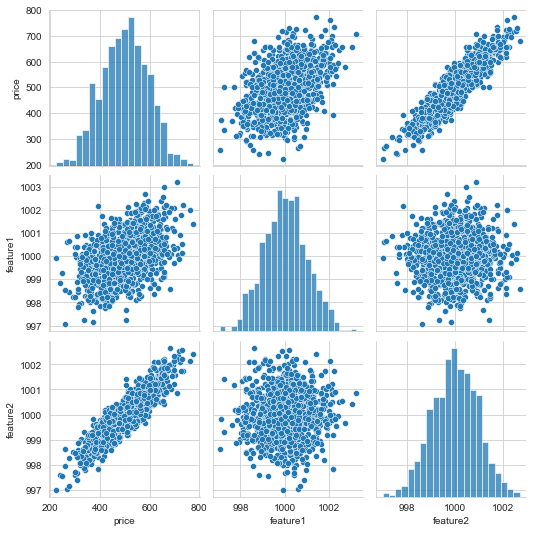

In [9]:
sns.pairplot(df);

In [10]:
df.corr()

,price,feature1,feature2
price,1.000,0.444,0.908
feature1,0.444,1.000,0.031
feature2,0.908,0.031,1.000


## Preprocessing of Data
- Train | Test Split, Scalling

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# X = df[['feature1', 'feature2']].values
# y = df['price'].values

In [ ]:
# Deeplearningde verileri array olarak verebiliriz. 

In [13]:
X = df[['feature1', 'feature2']]
y = df['price']

In [14]:
X

,feature1,feature2
0,999.788,999.766
1,998.862,1001.042
2,1000.070,998.844
3,999.952,1000.441
4,1000.446,1000.339
...,...,...
995,1000.019,999.673
996,998.855,1000.020
997,1001.452,998.848
998,1000.771,998.563


In [15]:
y

0     461.528
1     548.130
2     410.297
3     540.382
4     546.025
        ...  
995   476.526
996   457.313
997   456.721
998   403.316
999   599.367
Name: price, Length: 1000, dtype: float64

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [17]:
X_train.shape

(700, 2)

In [18]:
X_test.shape

(300, 2)

In [ ]:
# DL de genelde MinMax scale kullanilir
# daha kucuk bir araliga sikistirir
# araliklar ne kadar kucuk olursa o kadar iyi 
# islem hacmi de azalir
# dummyleri de muhafaza eder
# outlier durumunda robustscaler tercih edilebilir

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()

In [21]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Modelling

In [22]:
import tensorflow as tf

In [23]:
from tensorflow.keras.models import Sequential
# ann yapisini nasil olusturacagimizi belirler(Sequential, sira anlamindadir)
# sequential haricinde yapilar da var
from tensorflow.keras.layers import Input, Dense, Activation
# Input Layer, Dense Layer(densly connected/fully connected katman tipi), Activation Layer katmanlari indirilir


In [ ]:
# Katmanlarin olusturulma seklini Sequential(Seri olarak) olarak seciyoruz.

In [24]:
help(Sequential)

Help on class Sequential in module keras.engine.sequential:

class Sequential(keras.engine.functional.Functional)
 |  Sequential(*args, **kwargs)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(tf.keras.layers.Dense(4))
 |  
 |  # This is identical to the following:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.Input(shape=(16,)))
 |  model.add(tf.keras.layers.Dense(8))
 |  
 |  # Note that you can also omit the `input_shape` argument.
 |  # In that case the model doesn't have any weights until the first call
 |  # to a training/evaluation method (since it isn't yet built):
 |  model = tf.keras.Sequentia

In [25]:
# Dense Layer herbir nöronun bir dger layerdaki tüm neronlarla kontak olmasi demek. Fullkontak

In [26]:
help(Dense)

Help on class Dense in module keras.layers.core.dense:

class Dense(keras.engine.base_layer.Layer)
 |  Dense(*args, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`). These are all attributes of
 |  `Dense`.
 |  
 |  Note: If the input to the layer has a rank greater than 2, then `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 0 of the `kernel` (using `tf.tensordot`).
 |  For example, if input has dimensions `(batch_size, d0, d1)`,
 |  then we create a `kernel` with shape `(d1, units)`, and the `kernel` operates
 |  along axis 2 of the `input`, on every

In [27]:
X_train.shape

(700, 2)

In [28]:
# First way to create model

model = Sequential([Input(shape = X_train.shape[1]),  # girdi katmani 2 nöronlu(feature sayisi kadar)
                    Dense(units = 4, activation = "relu"),  # 1.gizli katman 4 nöronlu
                    Dense(units = 4, activation = "relu"),  # 2.gizli katman 4 nöronlu
                    Dense(units = 4, activation = "relu"),  # 3.gizli katman 4 nöronlu
                    Dense(units = 1)])  # cikti katmani tek nöronlu
                    
# listenin elemanlari olarak model liste icersinde tanimlanabilir ancak
# asagidaki gibi ayri ayri add tanimlamak tasiye edilir


In [29]:
# Second way to create model (recommended)
# Buarada Layer lari ekleyerek modeli olusturuyoruz.
# Input Layerinda feature sayisinca nöron olusturuyoruz, bu nedenle shape[1] aldik
# Output Layerinda tek sonuc alincagindan bir nöron var

model = Sequential()
#model.add(Input(shape = X_train.shape[1]))
model.add(Dense(units = 4, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 1))

In [ ]:
# Second way to create model (recommended)

model = Sequential()
# model.add(Input(shape = X_train.shape[1]))
# girdi katmani bu sekilde de tanimlanabilir 
# asagidaki gibi de ilk gizli katman icinde de tanimlanabilir
model.add(Dense(units = 4, activation = "relu", input_dim = X_train.shape[1]))
# 1.gizli katman 4 nöronlu ve girdi katmani 2 nöronlu(feature sayisi kadar)
model.add(Dense(units = 4, activation = "relu"))
# 2.gizli katman 4 nöronlu
model.add(Dense(units = 4, activation = "relu"))
# 3.gizli katman 4 nöronlu
model.add(Dense(units = 1))
# cikti katmani tek nöronlu

# hidden layerlarda genelde relu kullanilir, regression ve CNNde özellikle
# gizli katmanlarin tamaminda ayni aktivasyon fonksiyonu vermesi tercih edilir
# aktivasyon fonksiyonu verilmemisse varsayilani relu'dur.


In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4)                 12        
                                                                 
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
 dense_6 (Dense)             (None, 4)                 20        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.summary()
# 2x4(w)+4(b)=12 parameter 
# 4x4(w)+4(b)=20 parameter
# 4x4(w)+4(b)=20 parameter
# 4(w)+1(b)=5 parameter
# Transfer learningde daha önceden egitilmis bir model üzerinde calsildiginda non-trainable params sayisinda sayisal deger olur.

In [31]:
model.weights
# agirliklarin random atanmasinda farkli yöntemler vardir
# bias initializer gibi
# genellikle default degerler tercih edilir
# numpy=array([[-0.36038518,  0.2558725 , -0.6410754 , -0.8546877 ],
             # [ 0.20227218, -0.92446685,  0.23795533,  0.5999191 ]]
             # baslangic agirlik degerleri, dense_16
# numpy=array([0., 0., 0., 0.] baslangic bias degeleri


[<tf.Variable 'dense_4/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[-0.412251  ,  0.18421865,  0.3292024 ,  0.4496212 ],
        [-0.58739567,  0.09551096, -0.8954141 ,  0.48544765]],
       dtype=float32)>,
 <tf.Variable 'dense_4/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_5/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[-0.10628194, -0.25682855,  0.4050266 , -0.5186499 ],
        [-0.7540831 ,  0.04194325, -0.1994111 ,  0.1970051 ],
        [-0.8291726 , -0.618899  ,  0.22090548, -0.6090689 ],
        [-0.04112065,  0.54322904,  0.6418354 ,  0.36730117]],
       dtype=float32)>,
 <tf.Variable 'dense_5/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_6/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[-0.65463966,  0.529342  , -0.4339121 ,  0.10049605],
        [ 0.51283115,  0.22468632,  0.6917451 ,  0.48655802],
        [ 0.47854775,  0.39794165,  0.5660

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

In [32]:
model.compile(optimizer = "rmsprop", loss = "mse")

In [ ]:

# validation datasi konulmadi burarda
# 250 epochda data 250 defa egitimden gececek
# bunlar (21 adet)32lik batchler(data 32 32 verilir) halinde ve (1 adet) kalan 28 gozlemle birlikte 
# toplam 22 seferde 1 epoch tamamlanir
# bu sekilde egitim 250 defa tekrar edilir
# 1 epochda tüm 700 gözlem hizli bir sekilde 
# 32serli batchler halinde 22 iterasyonda 1/22, 2/22 ... 22/22 
# bu sekilde 250 epochda 250 egitim gerceklestirildi ve mse skoru
# 25k'dan 24lere kadar düsmüs oldu


In [33]:
model.fit(x = X_train, y = y_train, batch_size = 32, epochs = 250)

Epoch 1/250
22/22 [==============================] - 1s 2ms/step - loss: 256942.9531
Epoch 2/250
22/22 [==============================] - 0s 2ms/step - loss: 256782.5781
Epoch 3/250
22/22 [==============================] - 0s 2ms/step - loss: 256681.3750
Epoch 4/250
22/22 [==============================] - 0s 2ms/step - loss: 256624.1875
Epoch 5/250
22/22 [==============================] - 0s 2ms/step - loss: 256582.7812
Epoch 6/250
22/22 [==============================] - 0s 2ms/step - loss: 256540.9844
Epoch 7/250
22/22 [==============================] - 0s 2ms/step - loss: 256493.3750
Epoch 8/250
22/22 [==============================] - 0s 2ms/step - loss: 256439.0469
Epoch 9/250
22/22 [==============================] - 0s 2ms/step - loss: 256375.0469
Epoch 10/250
22/22 [==============================] - 0s 2ms/step - loss: 256296.0625
Epoch 11/250
22/22 [==============================] - 0s 2ms/step - loss: 256199.4062
Epoch 12/250
22/22 [==============================] - 0s 2ms/st

22/22 [==============================] - 0s 2ms/step - loss: 70.5623
Epoch 194/250
22/22 [==============================] - 0s 2ms/step - loss: 64.9474
Epoch 195/250
22/22 [==============================] - 0s 2ms/step - loss: 59.7487
Epoch 196/250
22/22 [==============================] - 0s 2ms/step - loss: 56.0325
Epoch 197/250
22/22 [==============================] - 0s 2ms/step - loss: 51.3821
Epoch 198/250
22/22 [==============================] - 0s 2ms/step - loss: 47.4259
Epoch 199/250
22/22 [==============================] - 0s 2ms/step - loss: 43.8945
Epoch 200/250
22/22 [==============================] - 0s 2ms/step - loss: 40.5432
Epoch 201/250
22/22 [==============================] - 0s 2ms/step - loss: 38.8045
Epoch 202/250
22/22 [==============================] - 0s 2ms/step - loss: 36.4716
Epoch 203/250
22/22 [==============================] - 0s 2ms/step - loss: 34.4663
Epoch 204/250
22/22 [==============================] - 0s 2ms/step - loss: 32.8798
Epoch 205/250
22/2

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4)                 12        
                                                                 
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
 dense_6 (Dense)             (None, 4)                 20        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.weights
# egitimden sonraki nihai agirlik ve bias degerleri(57 parametre) asagidaki gibi 
# güncellenmis oldu


[<tf.Variable 'dense_4/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[-0.412251  ,  0.08504167,  0.21564345,  1.9636163 ],
        [-0.58739567,  0.00770189, -0.99301606,  3.9923868 ]],
       dtype=float32)>,
 <tf.Variable 'dense_4/bias:0' shape=(4,) dtype=float32, numpy=array([ 0.        , -0.09502284, -0.11665633,  0.70100296], dtype=float32)>,
 <tf.Variable 'dense_5/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[-0.10628194, -0.25682855,  0.4050266 , -0.5186499 ],
        [-0.7540831 , -0.04172851, -0.26113775,  0.11558922],
        [-0.8291726 , -0.45542148,  0.40643108, -0.5182582 ],
        [-0.04112065,  2.790267  ,  2.9709475 ,  2.5465043 ]],
       dtype=float32)>,
 <tf.Variable 'dense_5/bias:0' shape=(4,) dtype=float32, numpy=array([0.       , 0.6488489, 0.7107799, 0.5652241], dtype=float32)>,
 <tf.Variable 'dense_6/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[-0.65463966,  0.529342  , -0.4339121 ,  0.10049605],
        [ 2.504537  ,  2.527877  ,  2.23

In [36]:
model.history.history

{'loss': [256942.953125,
  256782.578125,
  256681.375,
  256624.1875,
  256582.78125,
  256540.984375,
  256493.375,
  256439.046875,
  256375.046875,
  256296.0625,
  256199.40625,
  256084.015625,
  255949.921875,
  255796.359375,
  255620.15625,
  255421.625,
  255197.578125,
  254946.53125,
  254665.6875,
  254344.3125,
  253982.765625,
  253575.6875,
  253120.3125,
  252614.5625,
  252056.5,
  251441.296875,
  250765.140625,
  250023.75,
  249212.546875,
  248334.40625,
  247380.203125,
  246340.140625,
  245220.109375,
  244019.890625,
  242725.765625,
  241338.109375,
  239850.421875,
  238261.578125,
  236572.15625,
  234776.140625,
  232860.28125,
  230837.1875,
  228684.9375,
  226412.6875,
  224027.203125,
  221495.546875,
  218837.53125,
  216047.59375,
  213128.953125,
  210058.28125,
  206850.75,
  203506.0625,
  200025.578125,
  196386.453125,
  192594.96875,
  188660.375,
  184600.671875,
  180376.296875,
  176020.921875,
  171506.015625,
  166877.25,
  162086.15625,
 

In [37]:
pd.DataFrame(model.history.history)

,loss
0,256942.953
1,256782.578
2,256681.375
3,256624.188
4,256582.781
...,...
245,24.387
246,24.510
247,24.000
248,24.276


<AxesSubplot:>

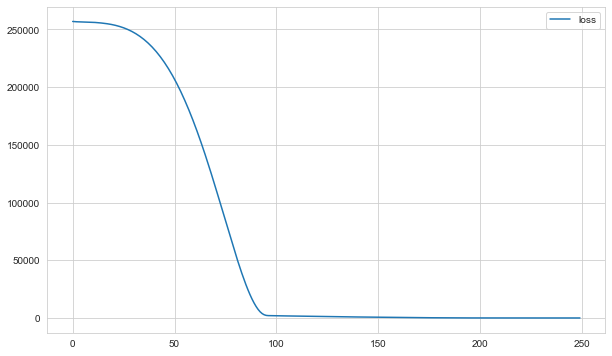

In [38]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

(0.0, 3000.0)

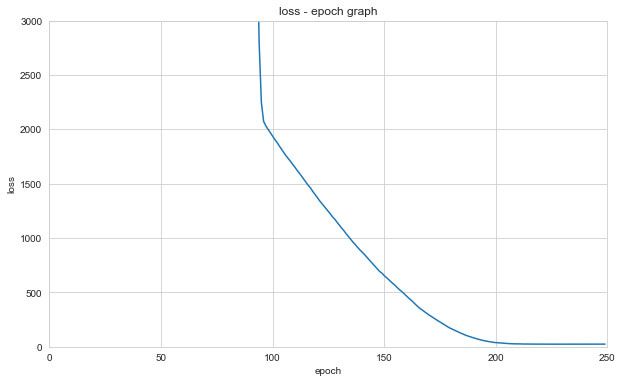

In [39]:
fig, ax= plt.subplots()
ax.plot(loss_df)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([0, 250]) # focusing on the given x values
ax.set_ylim([0, 3000]) # focusing on the given y values

## Model Performance

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [41]:
model.evaluate(X_train, y_train, verbose=0)

23.877620697021484

In [42]:
model.evaluate(X_test, y_test, verbose=0)

25.64124298095703

In [43]:
y_pred = model.predict(X_test)

10/10 [==============================] - 0s 2ms/step


In [44]:
my_dict = {"Actual" : y_test, "Pred" : y_pred.reshape(-1,)}
compare = pd.DataFrame(my_dict)
compare.sample(10)

,Actual,Pred
275,697.707,691.697
298,511.367,512.998
256,578.224,576.943
357,400.635,399.155
277,578.329,582.485
370,424.811,425.336
445,516.286,512.984
380,392.704,388.610
587,512.584,518.115
306,528.129,532.462


<AxesSubplot:xlabel='Actual', ylabel='Pred'>

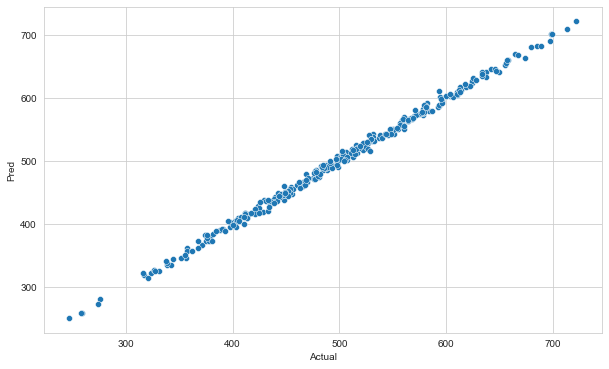

In [45]:
sns.scatterplot(x = 'Actual', y = 'Pred', data = compare)

In [46]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [47]:
eval_metric(y_test, y_pred)

r2_score: 0.9970835785976265 
mae: 4.086397092060296 
mse: 25.641269319355043 
rmse: 5.063720896668284


## Final Model and Model Deployment

### Final Model Training

In [48]:
scaler = MinMaxScaler().fit(X)

In [49]:
import pickle
pickle.dump(scaler, open("scaler_fake_reg", 'wb'))

In [50]:
X_scaled = scaler.transform(X)

In [51]:
final_model = Sequential()

final_model.add(Dense(units = 4, activation = "relu"))     # input_dim = 2 or input_dim = X_train.shape[1]
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(1))

final_model.compile(optimizer = "rmsprop", loss = "mse")

final_model.fit(x = X_scaled, y = y, batch_size = 32, epochs = 250)

Epoch 1/250
32/32 [==============================] - 1s 2ms/step - loss: 257435.8750
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 257249.3750
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 257036.2031
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 256783.8125
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 256495.0312
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 256148.9844
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 255729.6562
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 255237.4219
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 254663.8594
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 254004.3750
Epoch 11/250
32/32 [==============================] - 0s 2ms/step - loss: 253240.1719
Epoch 12/250
32/32 [==============================] - 0s 2ms/st

32/32 [==============================] - 0s 2ms/step - loss: 24.7157
Epoch 196/250
32/32 [==============================] - 0s 2ms/step - loss: 24.6117
Epoch 197/250
32/32 [==============================] - 0s 2ms/step - loss: 24.6465
Epoch 198/250
32/32 [==============================] - 0s 2ms/step - loss: 24.3278
Epoch 199/250
32/32 [==============================] - 0s 2ms/step - loss: 24.8140
Epoch 200/250
32/32 [==============================] - 0s 2ms/step - loss: 24.4939
Epoch 201/250
32/32 [==============================] - 0s 2ms/step - loss: 24.4814
Epoch 202/250
32/32 [==============================] - 0s 2ms/step - loss: 24.5646
Epoch 203/250
32/32 [==============================] - 0s 2ms/step - loss: 24.5291
Epoch 204/250
32/32 [==============================] - 0s 2ms/step - loss: 24.7149
Epoch 205/250
32/32 [==============================] - 0s 2ms/step - loss: 24.5088
Epoch 206/250
32/32 [==============================] - 0s 2ms/step - loss: 24.6397
Epoch 207/250
32/3

### Saving a Model

You can save a TensorFlow/Keras model using [`model.save()`](https://www.tensorflow.org/tutorials/keras/save_and_load#save_the_entire_model).

Keras saves models by inspecting their architectures. This technique saves everything:

- The weight values
- The model's architecture
- The model's training configuration (what you pass to the .compile() method)
- The optimizer and its state, if any (this enables you to restart training where you left off)

There are two ways to save a model in TensorFlow:
1. The [SavedModel format](https://www.tensorflow.org/tutorials/keras/save_and_load#savedmodel_format) (default).
2. The [HDF5 format](https://www.tensorflow.org/tutorials/keras/save_and_load#hdf5_format).

The main difference between the two is the SavedModel is automatically able to save custom objects (such as special layers) without additional modifications when loading the model back in.

The key difference between HDF5 and SavedModel is that HDF5 uses object configs to save the model architecture, while SavedModel saves the execution graph. Thus, SavedModels are able to save custom objects like subclassed models and custom layers without requiring the original code.

In [ ]:
#

In [52]:
final_model.save('model_fake_reg.h5')  # creates a HDF5 file 'my_model.h5'

In [ ]:
#final_model.save("model_fake_reg") 

### Loading Model

In [53]:
from tensorflow.keras.models import load_model

In [54]:
model_fake_reg = load_model('model_fake_reg.h5')

In [55]:
scaler_fake_reg = pickle.load(open("scaler_fake_reg", "rb"))

## Prediction-1

In [56]:
sample = [[998, 1000]]

In [57]:
sample_scaled = scaler_fake_reg.transform(sample)

In [58]:
model_fake_reg.predict(sample_scaled)

1/1 [==============================] - 0s 75ms/step


array([[417.93076]], dtype=float32)

## Prediction-2

In [59]:
my_dict = {"Feature1": [997, 998, 999, 1000, 1001],
           "Feature2": [1000, 999, 998, 997, 996]}

In [60]:
sample = pd.DataFrame(my_dict)
sample

,Feature1,Feature2
0,997,1000
1,998,999
2,999,998
3,1000,997
4,1001,996


In [61]:
sample_scaled = scaler_fake_reg.transform(sample)
sample_scaled

array([[-0.00948799,  0.52980619],
       [ 0.15312457,  0.35345977],
       [ 0.31573713,  0.17711336],
       [ 0.47834969,  0.00076694],
       [ 0.64096225, -0.17557948]])

In [62]:
model_fake_reg.predict(sample_scaled)

1/1 [==============================] - 0s 35ms/step


array([[377.96393],
       [329.72897],
       [281.49405],
       [233.25911],
       [185.02415]], dtype=float32)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___